# Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем датасет с помощью Pandas
data = pd.read_csv('AB_NYC_2019.csv')

# Отрезаем очевидно лишние колонки
cols_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review']
data = data.drop(columns=cols_to_drop)

# Заполняем NoN в reviews_per_month
data['reviews_per_month'] = data['reviews_per_month'].fillna(-999)

In [184]:
from sklearn.preprocessing import LabelEncoder

# def f_encoder(data, feat1, feat2, feat3)
#     list_feat2 = list(data[feat2].unique()
#     for i in list_feat2:
#         data[data[feat2] == i][feat3] = data[feat1]*1000 + list_feat2.index(i)


le = LabelEncoder()
data['room_type'] = le.fit_transform(data['room_type'])
data['neighbourhood_group'] = le.fit_transform(data['neighbourhood_group'])

list_feat2 = list(data['neighbourhood'].unique())
for i in list_feat2:
    # data[data['neighbourhood'] == i]['neighbourhood_1'] = data['neighbourhood_group']*1000 + list_feat2.index(i)
    data.loc[data['neighbourhood'] == i, 'neighbourhood_1'] = data.loc[data['neighbourhood'] == i, 'neighbourhood_group']*1000 + list_feat2.index(i)
# data['neighbourhood'] = le.fit_transform(data["neighbourhood"])
# data['neighbourhood'] = data['neighbourhood_group'] * 1000 + data['neighbourhood']

data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_1
0,1,Kensington,40.64749,-73.97237,1,149,1,9,0.21,6,365,1000.0
1,2,Midtown,40.75362,-73.98377,0,225,1,45,0.38,2,355,2001.0
2,2,Harlem,40.80902,-73.94190,1,150,3,0,-999.00,1,365,2002.0
3,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,4.64,1,194,1003.0
4,2,East Harlem,40.79851,-73.94399,0,80,10,9,0.10,1,0,2004.0


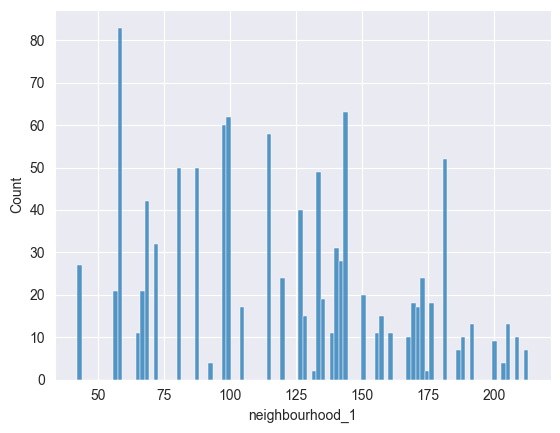

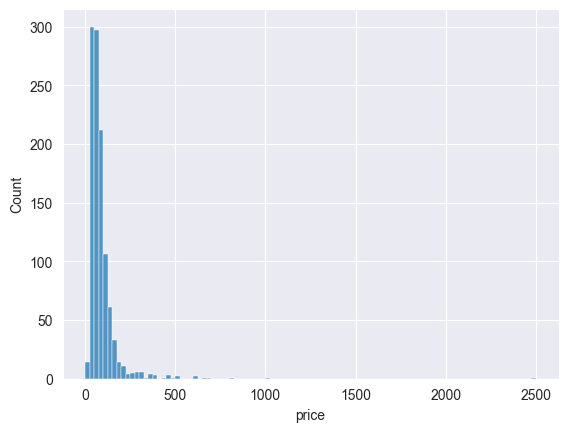

In [192]:
# for feat in ['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']:
for feat in ['neighbourhood_1', 'price']:
    sns.histplot(
            data=data[data['neighbourhood_group'] == 0],
            bins=100,
            x=feat
        )
    plt.show()

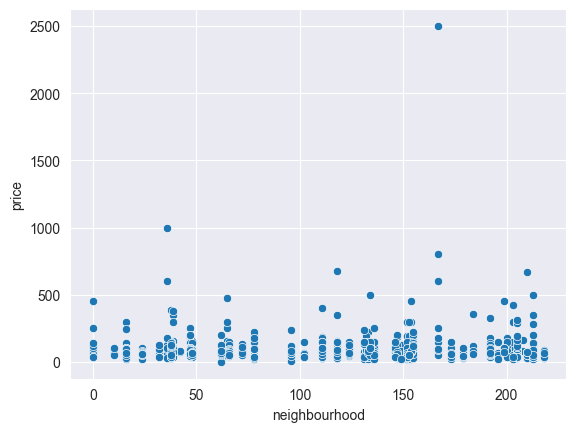

In [175]:
# sns.pairplot(
#     data[data['room_type'] == 0],
#     # vars=['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'],
#     vars=['neighbourhood', 'price'],
# )

sns.scatterplot(data=data[data['neighbourhood_group'] == 0], x='neighbourhood', y='price')
plt.show()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,2127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,2094,40.80902,-73.94190,1,150,3,0,-999.00,1,365
3,1,1041,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,2061,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [106]:
lat = (data[data['neighbourhood_group'] == 2]['latitude'].max() - data[data['neighbourhood_group'] == 2]['longitude'].min()) / 2
lon = (data[data['neighbourhood_group'] == 2]['latitude'].max() - data[data['neighbourhood_group'] == 2]['longitude'].min()) / 2

data['dist'] = abs(data['latitude'] - lat) + abs(data['longitude'] - lon)



In [107]:
data.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dist
0,1,1108,40.64749,-73.97237,1,149,1,9,0.21,6,365,148.22004
1,2,2127,40.75362,-73.98377,0,225,1,45,0.38,2,355,148.12531
2,2,2094,40.80902,-73.94190,1,150,3,0,-999.00,1,365,148.02804
3,1,1041,40.68514,-73.95976,0,89,1,270,4.64,1,194,148.16978
4,2,2061,40.79851,-73.94399,0,80,10,9,0.10,1,0,148.04064


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['price'], axis=1),
    data['price'],
    test_size=0.30,
    random_state=42,
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_test_predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_predictions))
print("RMSE:", rmse)



RMSE: 187.91129073668768


In [171]:
# data[(data['neighbourhood_group'] == 0) & (data['price'] > 2000)].head()

data_neighbourhood = data[(data['neighbourhood_group'] == 3) & (data['room_type'] == 2)]
mean = data_neighbourhood['price'].mean()
std = data_neighbourhood['price'].std()

outliers = data_neighbourhood[abs(data_neighbourhood["price"] - mean) > 5 * std]
outliers.sort_values(by="price", ascending=False)
# data_neighbourhood

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dist
14380,3,3004,40.76626,-73.93054,2,1800,3,5,0.13,2,90,148.05944
30080,3,3117,40.74786,-73.94628,2,1250,1,1,0.06,1,173,148.09358
23545,3,3077,40.76796,-73.81732,2,1000,1,0,-999.00,1,0,147.94452
